# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

### Training Image preprocessing

In [56]:
# training_set = tf.keras.utils.image_dataset_from_directory(
#     r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\train",
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(128, 128),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )


import tensorflow as tf
from tensorflow.keras.layers import Rescaling

# Load Training Data
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42
)

# Load Validation Data
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42
)

# Normalize the images (convert pixel values from 0-255 to 0-1)
training_set = training_set.map(lambda x, y: (Rescaling(1./255)(x), y))
validation_set = validation_set.map(lambda x, y: (Rescaling(1./255)(x), y))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


### Validation Image Preprocessing

In [57]:
# validation_set = tf.keras.utils.image_dataset_from_directory(
#     r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\valid",
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(128, 128),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [58]:
# from tensorflow.keras.layers import Rescaling

# train_ds = training_set.map(lambda x, y: (Rescaling(1./255)(x), y))
# val_ds = validation_set.map(lambda x, y: (Rescaling(1./255)(x), y))


In [73]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())  # Added
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())  # Added
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())  # Added
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())  # Added
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening and Fully Connected Layer
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))  # Helps prevent overfitting

# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))  # 38 classes

# Compile the Model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)       

### Building Convolution Layer

In [60]:
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [61]:
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [62]:
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [63]:
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [64]:
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [65]:
# cnn.add(tf.keras.layers.Dropout(0.25))

In [66]:
# cnn.add(tf.keras.layers.Flatten())

In [67]:
# cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [68]:

# cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [69]:

# #Output Layer
# cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [70]:

# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:

# cnn.summary()

In [74]:
# training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)

# Train the Model
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,  # Increase epochs for better learning
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
2197/2197 [==============================] - 354s 161ms/step - loss: 1.0502 - accuracy: 0.6952 - val_loss: 0.7960 - val_accuracy: 0.7519
Epoch 2/15
2197/2197 [==============================] - 278s 126ms/step - loss: 0.3853 - accuracy: 0.8788 - val_loss: 0.7909 - val_accuracy: 0.7713
Epoch 3/15
2197/2197 [==============================] - 275s 125ms/step - loss: 0.2357 - accuracy: 0.9246 - val_loss: 0.3889 - val_accuracy: 0.8854
Epoch 4/15
2197/2197 [==============================] - 266s 121ms/step - loss: 0.1628 - accuracy: 0.9475 - val_loss: 0.5619 - val_accuracy: 0.8506
Epoch 5/15
2197/2197 [==============================] - 286s 130ms/step - loss: 0.1267 - accuracy: 0.9586 - val_loss: 0.2353 - val_accuracy: 0.9311
Epoch 6/15
2197/2197 [==============================] - 307s 140ms/step - loss: 0.0986 - accuracy: 0.9683 - val_loss: 0.2208 - val_accuracy: 0.9359
Epoch 7/15
2197/2197 [==============================] - 290s 132ms/step - loss: 0.0756 - accuracy: 0.9756 - val_

## Evaluating Model

In [75]:
# Evaluate Training Set
train_loss, train_acc = cnn.evaluate(training_set, verbose=1)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Evaluate Validation Set
val_loss, val_acc = cnn.evaluate(validation_set, verbose=1)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


2197/2197 [==============================] - 139s 63ms/step - loss: 0.0465 - accuracy: 0.9838
Training Accuracy: 98.38%
550/550 [==============================] - 29s 51ms/step - loss: 0.1342 - accuracy: 0.9602
Validation Accuracy: 96.02%


In [76]:
val_loss, val_acc = cnn.evaluate(validation_set, verbose=1)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


550/550 [==============================] - 20s 36ms/step - loss: 0.1342 - accuracy: 0.9602
Validation Accuracy: 96.02%


### Saving Model

In [77]:
cnn.save('trained_plant_disease_model.keras')

In [78]:
training_history.history #Return Dictionary of history

{'loss': [1.0501959323883057,
  0.3852624297142029,
  0.23571011424064636,
  0.16276338696479797,
  0.12668870389461517,
  0.09860338270664215,
  0.07558966428041458,
  0.07026925683021545,
  0.06028703227639198,
  0.057252902537584305,
  0.04480002820491791,
  0.044829051941633224],
 'accuracy': [0.6952415108680725,
  0.8787965178489685,
  0.9245607852935791,
  0.9474784731864929,
  0.9586314558982849,
  0.9682623147964478,
  0.9755886197090149,
  0.9767408967018127,
  0.9812931418418884,
  0.9818621277809143,
  0.9852479100227356,
  0.9854186177253723],
 'val_loss': [0.7960453033447266,
  0.7908565402030945,
  0.3888608515262604,
  0.5618537664413452,
  0.23526783287525177,
  0.2207539826631546,
  0.13424144685268402,
  0.24493801593780518,
  0.6992591023445129,
  0.22687548398971558,
  0.2122717797756195,
  0.3959061801433563],
 'val_accuracy': [0.7519348859786987,
  0.7712838649749756,
  0.8854427337646484,
  0.8505576848983765,
  0.9311404228210449,
  0.9358638525009155,
  0.96016

In [79]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [80]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

In [81]:
print(len(training_history.history['accuracy']))  
print(len(training_history.history['val_accuracy']))  


12
12


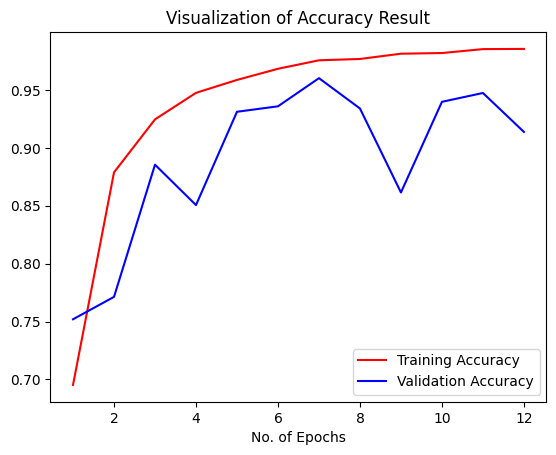

In [82]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
        r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 90s 5ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.97       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.86      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.99      0.

### Confusion Matrix Visualization

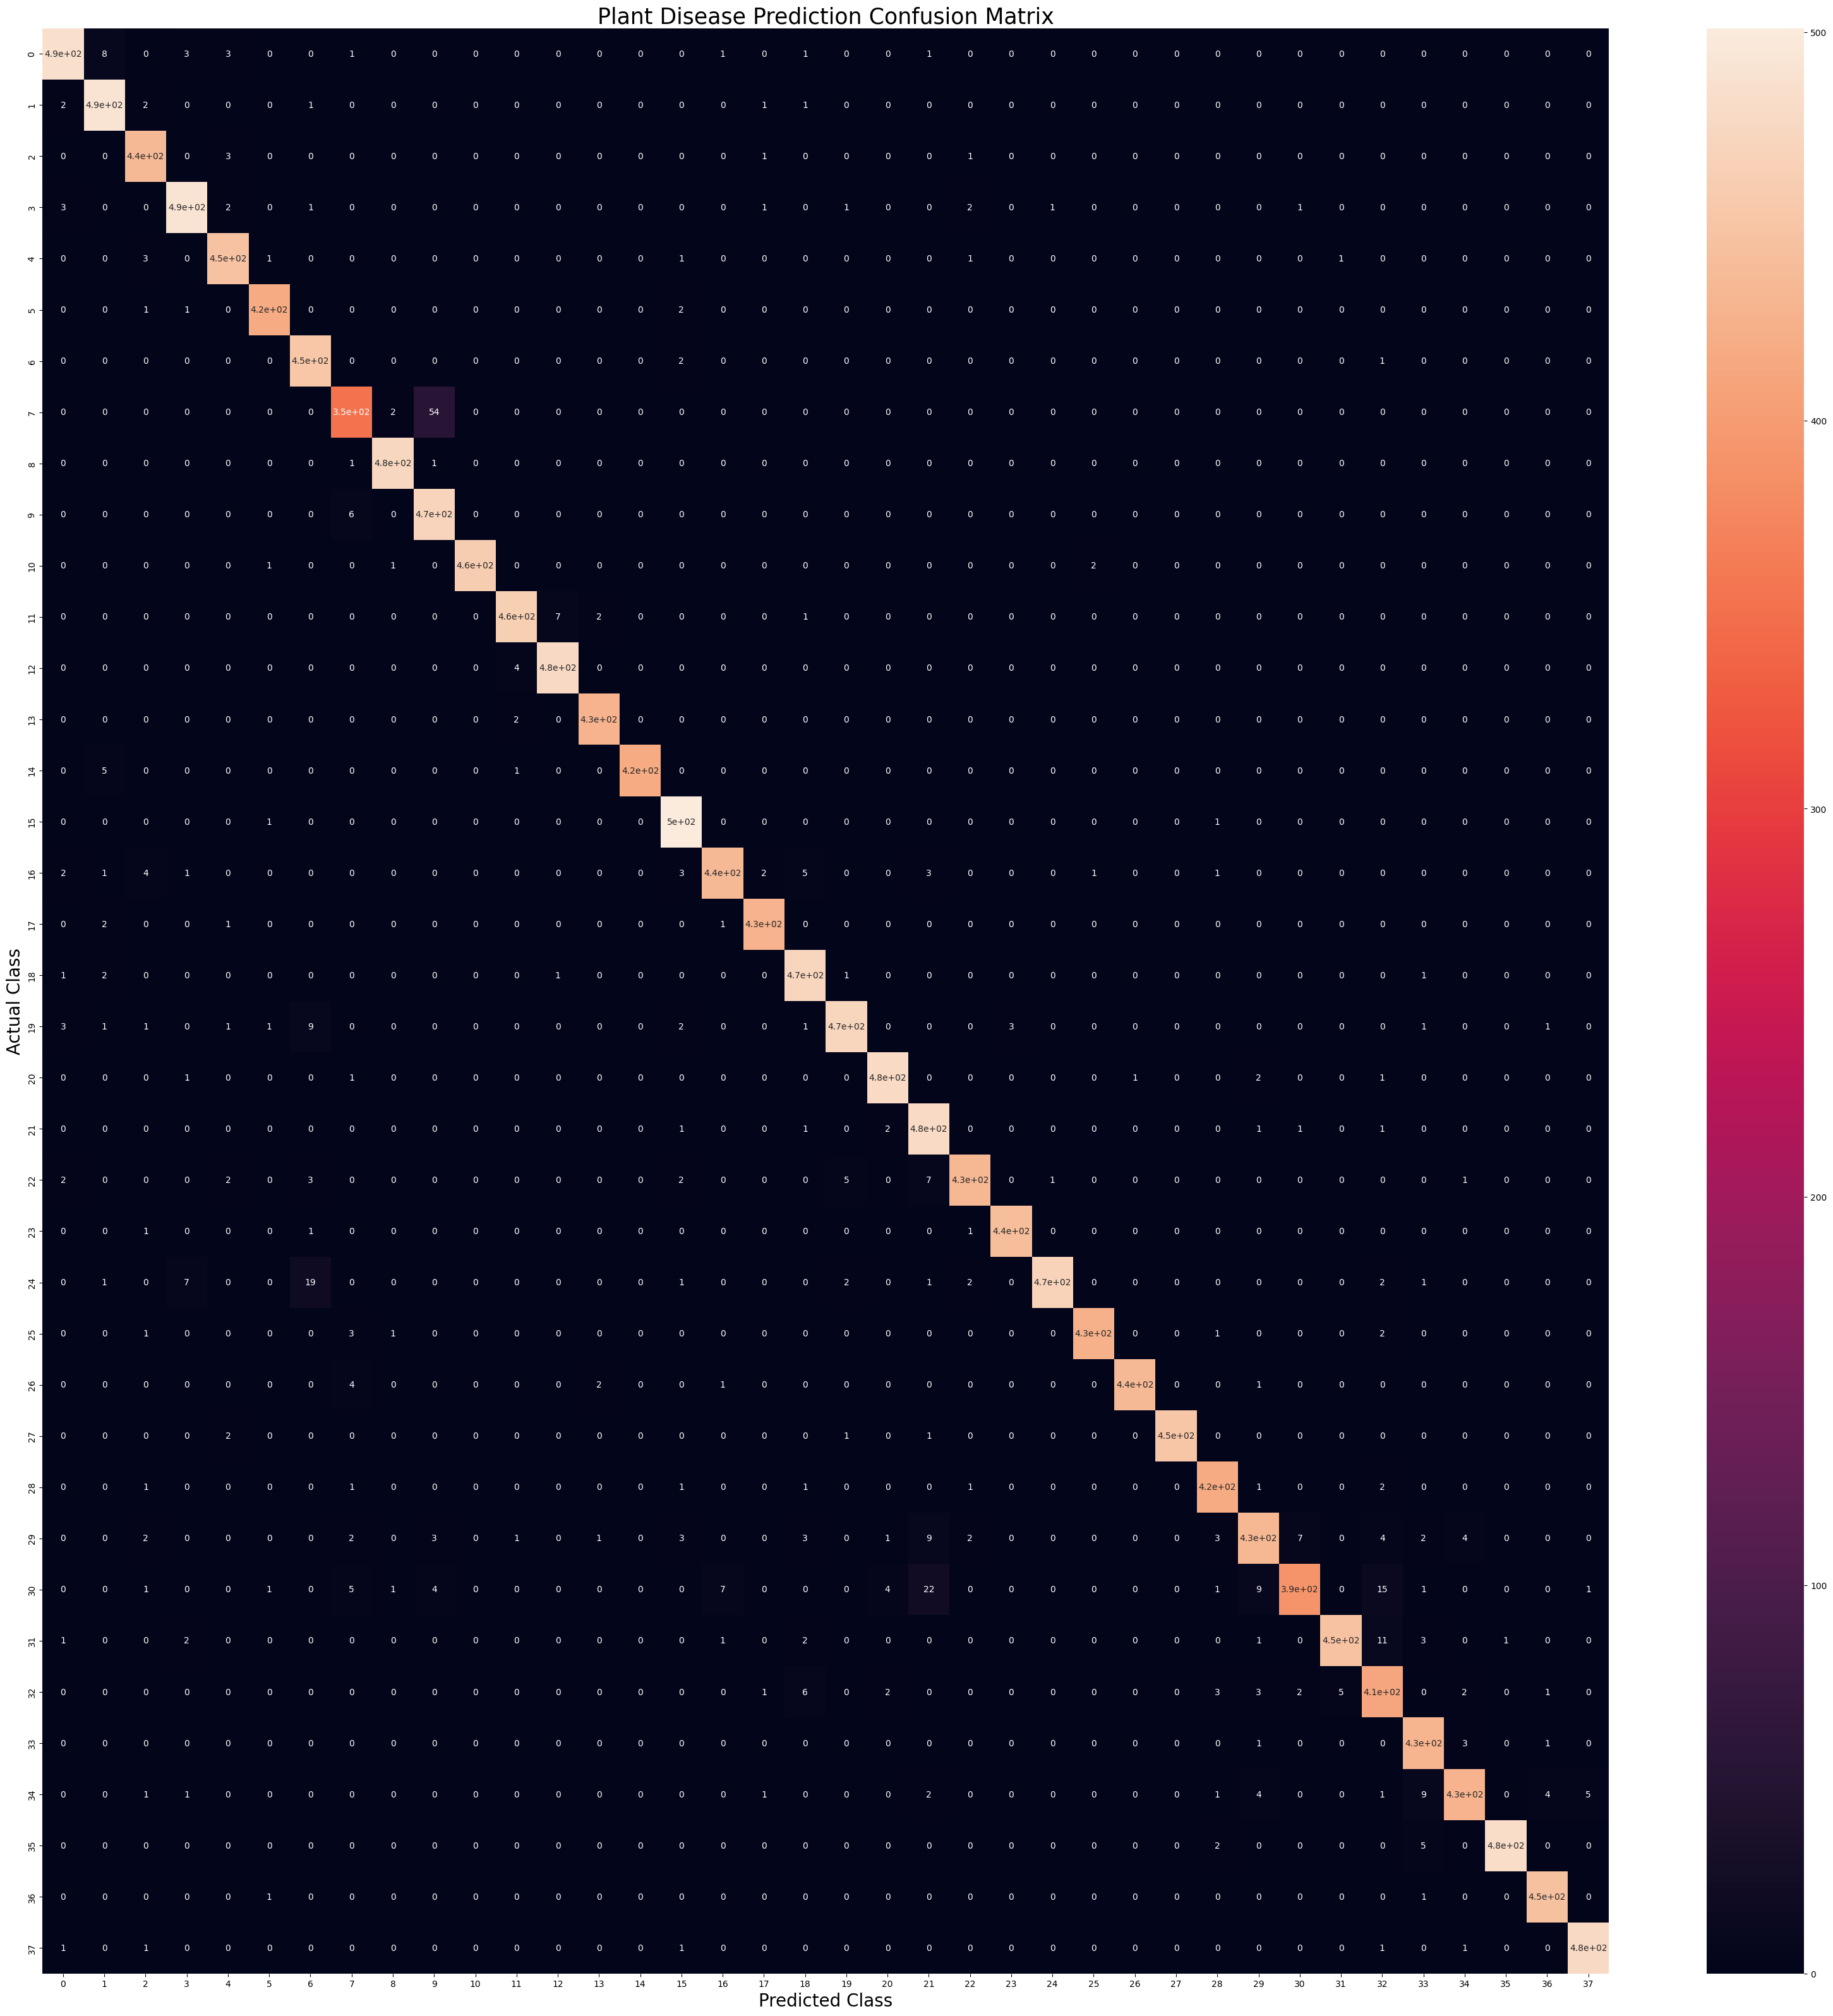

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()